In [45]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [3]:
from spotipy.oauth2 import SpotifyClientCredentials

credent_manager = SpotifyClientCredentials(
    '2836a2873f944284bd215a1446576b5f','cb8f4d87fc154e979dc3267d17f39e13')

In [4]:
import spotipy
sp = spotipy.Spotify(client_credentials_manager=credent_manager)

In [12]:
albums = sp.artist_albums('3rD7bBI9zkYhu62o79tWe6')

In [6]:
audio_feats = sp.audio_features('4aaco211p3HFubmFfBoaxj')
audio_feats

[{'danceability': 0.582,
  'energy': 0.356,
  'key': 2,
  'loudness': -8.716,
  'mode': 1,
  'speechiness': 0.0321,
  'acousticness': 0.452,
  'instrumentalness': 0.126,
  'liveness': 0.118,
  'valence': 0.608,
  'tempo': 130.898,
  'type': 'audio_features',
  'id': '4aaco211p3HFubmFfBoaxj',
  'uri': 'spotify:track:4aaco211p3HFubmFfBoaxj',
  'track_href': 'https://api.spotify.com/v1/tracks/4aaco211p3HFubmFfBoaxj',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4aaco211p3HFubmFfBoaxj',
  'duration_ms': 80639,
  'time_signature': 4}]

In [7]:
audio_feats[0].keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [13]:
albums = [a for a in albums['items'] if a['album_type'] != 'single']

In [14]:
for a in albums:
    print(a['artists'][0]['name'])

Da Souza
Da Souza
Da Souza
Da Souza
Various Artists
Luiza Brina
Various Artists
Luiza Brina


In [15]:
doki_albums = [a for a in albums if a['artists'][0]['name'] == 'Da Souza']

In [16]:
for album in doki_albums:
    print(album['name'], album['id'], album['release_date'])

Futbol d'Avantguarda 4qS57UqXQClv8I88dSUSXL 2018-02-23
Gran Salt Endavant 6nKcvXnHK4U3nxzgWK1YZq 2016-02-26
Bossanova Infinita 4G8ict0Iv2rOo9hJFHEbfk 2015-02-03
Flors i Violència 4nzfhTmh7A4Kt1PipSdmgY 2013-12-10


In [17]:
features_required = ['energy', 'duration_ms', 'loudness', 'valence', 'danceability', 'tempo']
album_ids = [a['id'] for a in doki_albums]

In [18]:
album_id_to_name = {a['id']: a['name'] for a in doki_albums}

In [19]:
album_id_to_name

{'4qS57UqXQClv8I88dSUSXL': "Futbol d'Avantguarda",
 '6nKcvXnHK4U3nxzgWK1YZq': 'Gran Salt Endavant',
 '4G8ict0Iv2rOo9hJFHEbfk': 'Bossanova Infinita',
 '4nzfhTmh7A4Kt1PipSdmgY': 'Flors i Violència'}

In [20]:
def get_track_features(songs, service):
    track_ids = [s['id'] for s in songs]
    chunk_size = 50
    num_chunks = int(math.ceil(len(track_ids) / float(chunk_size)))
    features_add = []
    for i in range(num_chunks):
        chunk_track_ids = track_ids[i*chunk_size:(i+1)*chunk_size]
        chunk_features = service.audio_features(tracks=chunk_track_ids)
        features_add.extend(chunk_features)
    
    features_df = pd.DataFrame(features_add)
    features_df = features_df[features_required]
    return features_df

In [21]:
songs_df_data = []
for album_id in album_ids:
    #get songs in the album
    songs = sp.album_tracks(album_id=album_id)['items']
    features = get_track_features(songs, sp)
    features = features.values.tolist()
    for (track, feature) in zip(songs, features):
        t = track
        this_row = [t['id'], t['name'], album_id]       
        this_row.extend(feature)
        songs_df_data.append(this_row)

In [22]:
songs_df = pd.DataFrame(songs_df_data, columns=['id', 'name', 'album', 'energy', 
                                                'duration_ms', 'loudness','valence', 'danceability', 'tempo']).drop_duplicates(subset='id')

In [23]:
songs_df.album.replace (album_id_to_name, inplace=True)

In [24]:
songs_df

,id,name,album,energy,duration_ms,loudness,valence,danceability,tempo
0,4aaco211p3HFubmFfBoaxj,Noves Venècies,Futbol d'Avantguarda,0.356,80639.0,-8.716,0.6080,0.582,130.898
1,4N5E7jIK4Ti9yXoshshQ1J,Migracions de salmons,Futbol d'Avantguarda,0.610,195882.0,-7.193,0.6570,0.535,125.950
2,0hdwI9Xf7GnJUyUmXNETt0,Finals,Futbol d'Avantguarda,0.610,214981.0,-6.603,0.7200,0.638,130.071
3,0ERzbcM3uYCmH0zuONy02y,Tan enfora,Futbol d'Avantguarda,0.723,231531.0,-6.709,0.5370,0.607,120.025
4,2IjcG82yOERIFe9bV4dWrL,Dos microbis,Futbol d'Avantguarda,0.422,150776.0,-9.703,0.3840,0.375,153.432
5,38AYhf0HkBtdCii5beeXeT,Geometria damunt esferes,Futbol d'Avantguarda,0.670,231483.0,-7.346,0.4030,0.560,127.043
6,0QuZuNoiHhuRJEP0ZUQQIg,Estrelletes en la nit,Futbol d'Avantguarda,0.199,99290.0,-12.678,0.2610,0.661,129.947
7,2hBogaO48wTvQMiXjsFoKi,Una bicicleta,Futbol d'Avantguarda,0.658,219610.0,-8.971,0.4560,0.742,123.026
8,4fyAAjH3e3c6i2H0Lef5N8,Willkommen auf Mallorca,Futbol d'Avantguarda,0.576,97065.0,-8.728,0.6240,0.526,162.201
9,3vNSuxDQT8jMTwWfIMaptc,Palma Pina i Cas Catala,Futbol d'Avantguarda,0.710,121873.0,-6.118,0.6280,0.401,199.943


In [131]:
dancea = songs_df.groupby(by='album')['danceability']

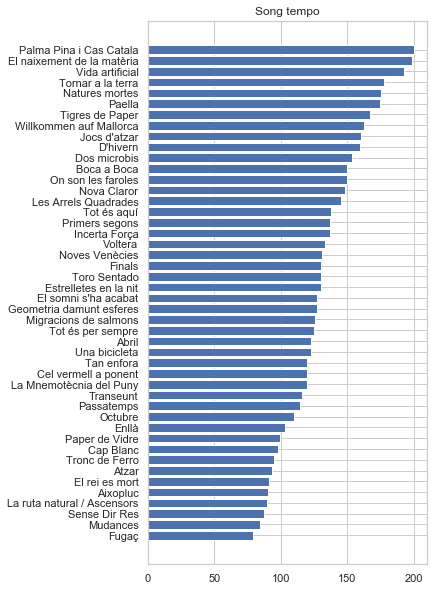

In [40]:
songs_df.sort_values('tempo', inplace=True)
plt.figure(figsize=(5,10))
plt.barh(songs_df.name, songs_df.tempo)
plt.title('Song tempo')
plt.show()

Tempo mitjà actual: 128.506
Desviació de 123: 5.506


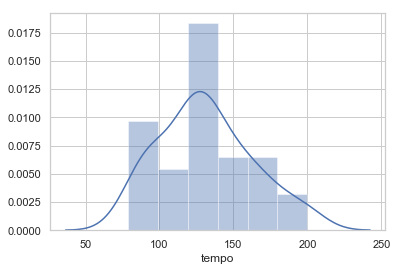

In [46]:
sns.distplot(songs_df.tempo)
print(f'Tempo mitjà actual: {songs_df.tempo.median()}\n'
      f'Desviació de 123: {songs_df.tempo.median() - 123}')

In [43]:
songs_df.tempo.median()

128.506